In [60]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PI = np.pi

In [61]:
class Oracle(QuantumCircuit):
    def __init__(self, n_qubits):
        assert n_qubits >= 2, "Invalid number of qubits!"
        self.n_qubits = n_qubits
        super().__init__(n_qubits, name="oracle")
        self.generate()
        
    def generate(self):
        self.ry(PI/2, range(self.n_qubits))
        for i in range(self.n_qubits-1):
            self.cry(-PI/2, i, i+1)

    def get_unitary(self, backend=AerSimulator()):
        qc_copy = self.copy()
        qc_copy.save_unitary()
        transpiled_qc = transpile(qc_copy, backend)
        return backend.run(transpiled_qc).result().get_unitary()

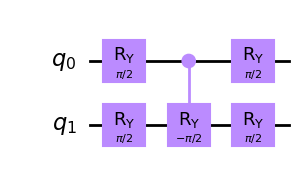

In [66]:
oracle = Oracle(2)
oracle.ry(PI/2, range(2))
display(oracle.draw('mpl'))
unitary = oracle.get_unitary()

In [67]:
array_to_latex(unitary, max_size=10000)

<IPython.core.display.Latex object>